In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pandas as pd


In [2]:
f = open('/Additional_Experiments/Appendix_E/uncertainty_results/cal_metrics_improved_model_reps.json')
data_improved_model = json.load(f)

f.close()

In [3]:
data_improved_model.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [4]:
data_improved_model['0'].keys()

dict_keys(['disjoint_oracles', 'bootstrapped_oracles'])

In [5]:
data_improved_model['0']['bootstrapped_oracles'].keys()

dict_keys(['10', '20', '30', '40'])

In [6]:
data_improved_model['0']['disjoint_oracles']['10'].keys()

dict_keys(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1'])

In [7]:
data_improved_model['0']['disjoint_oracles']['10']['0'].keys()

dict_keys(['tvd_biased', 'tvd_unbiased', 'ent_diff_biased', 'ent_diff_unbiased'])

In [8]:
def create_empty_dict(initial_dict):
    for oracle_seed in data_improved_model.keys():
        for oracle_type in data_improved_model[oracle_seed].keys():
            initial_dict[oracle_type] = {}
            for oracle_size in data_improved_model[oracle_seed][oracle_type].keys():
                initial_dict[oracle_type][oracle_size] = {}
                for proportion in data_improved_model[oracle_seed][oracle_type][oracle_size].keys():
                    initial_dict[oracle_type][oracle_size][proportion] = []

    final_dict = initial_dict
    return final_dict

In [9]:
tvd_biased = {}
tvd_biased = create_empty_dict(tvd_biased)

tvd_unbiased = {}
tvd_unbiased = create_empty_dict(tvd_unbiased)

ent_diff_biased = {}
ent_diff_biased = create_empty_dict(ent_diff_biased)

ent_diff_unbiased = {}
ent_diff_unbiased = create_empty_dict(ent_diff_unbiased)


In [10]:
metrics_dict = {'tvd_biased': tvd_biased, 'tvd_unbiased': tvd_unbiased, 'ent_diff_biased':ent_diff_biased, 'ent_diff_unbiased':ent_diff_unbiased}

In [11]:
#We will try to combine the metric values of all reps per metric wanted. For example, all TVD 'biased' values for all reps
#of all disjoint oracles of size 10 with 10% improtvement

for oracle_seed in data_improved_model.keys():
    for oracle_type in data_improved_model[oracle_seed].keys():
        for oracle_size in data_improved_model[oracle_seed][oracle_type].keys():
            for proportion in data_improved_model[oracle_seed][oracle_type][oracle_size].keys():
                for metric in data_improved_model[oracle_seed][oracle_type][oracle_size][proportion].keys():
                    add_list_metric = data_improved_model[oracle_seed][oracle_type][oracle_size][proportion][metric]
                    exist_list_metric = metrics_dict[metric][oracle_type][oracle_size][proportion].copy()
                    metrics_dict[metric][oracle_type][oracle_size][proportion] = exist_list_metric + add_list_metric


In [12]:
def convert_to_list(dict_metric):
    list_change = []
    list_metric = []
    for key in dict_metric.keys():
        for i in range(len(dict_metric[key])):
            list_change.append(key)
            list_metric.append(dict_metric[key][i])
    return list_change, list_metric

In [27]:
def make_ridge_plot(dict_with_proportions):
    list_change, list_metric = convert_to_list(dict_with_proportions)
    df = pd.DataFrame({'change': list_change, 'value': list_metric})

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    palette = sns.color_palette("Set2", 11)

    g = sns.FacetGrid(df, palette=palette, row="change", aspect=9, height=1.2)
    g.map_dataframe(sns.histplot, x="value", fill=True, alpha=1, bins = 10,  color='indianred')
    #g.map_dataframe(sns.histplot, x="value", color='blue')

    g.set_xlabels("TVD Histograms with k% induced model TVD values with oracle's",fontsize=20)
    g.set_ylabels("Count",fontsize=20)

    g.fig.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(left=True)

    plt.savefig('improved_model_reps_size_oracle_20.pdf')

## Total Variation Distance

#### Unbiased

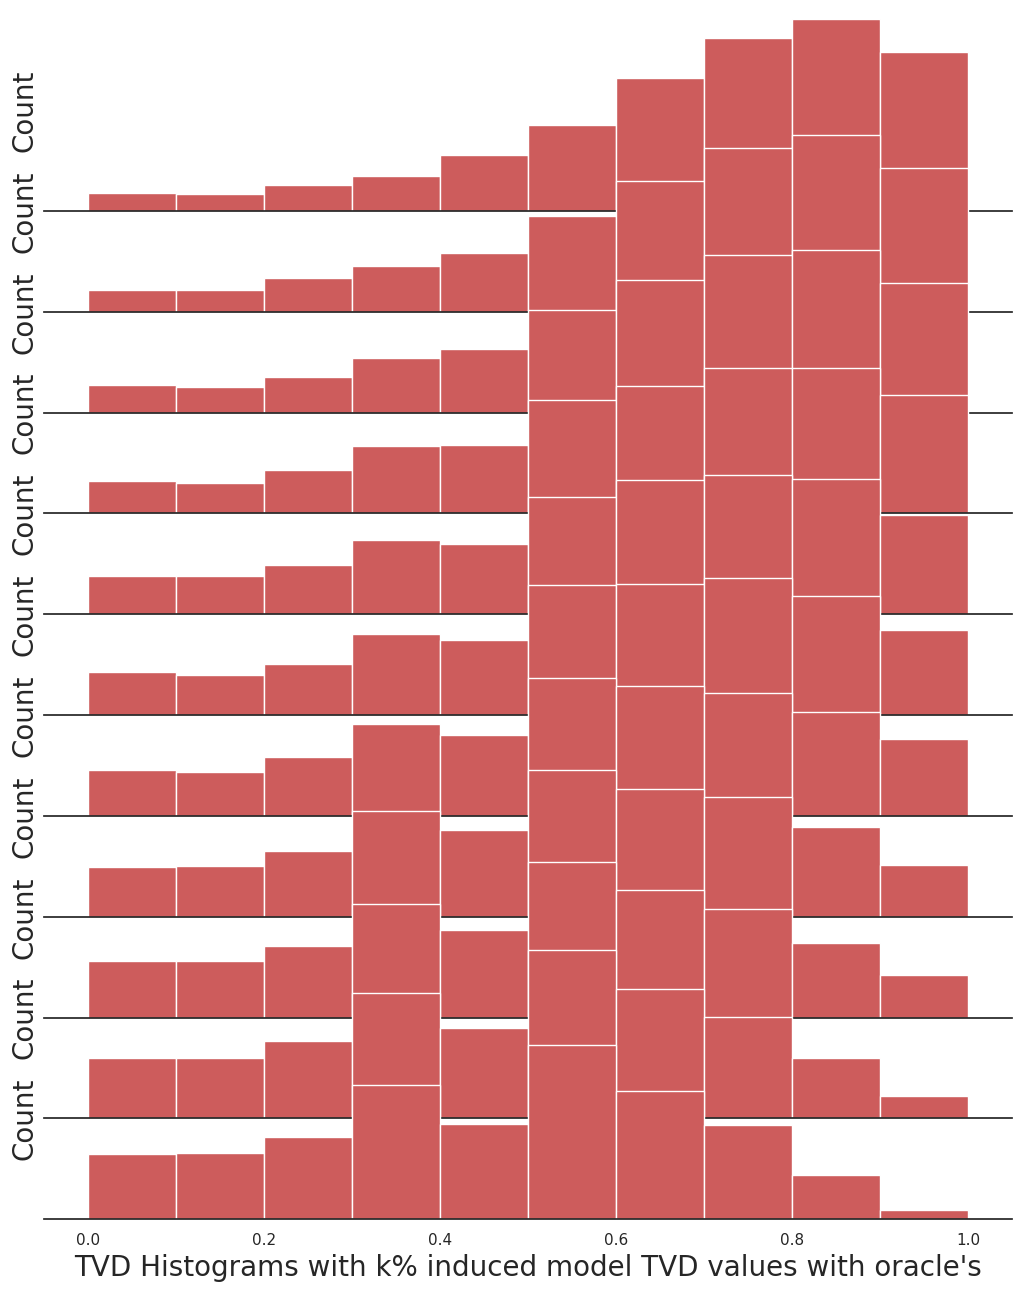

In [26]:
make_ridge_plot(metrics_dict['tvd_unbiased']['disjoint_oracles']['10'])

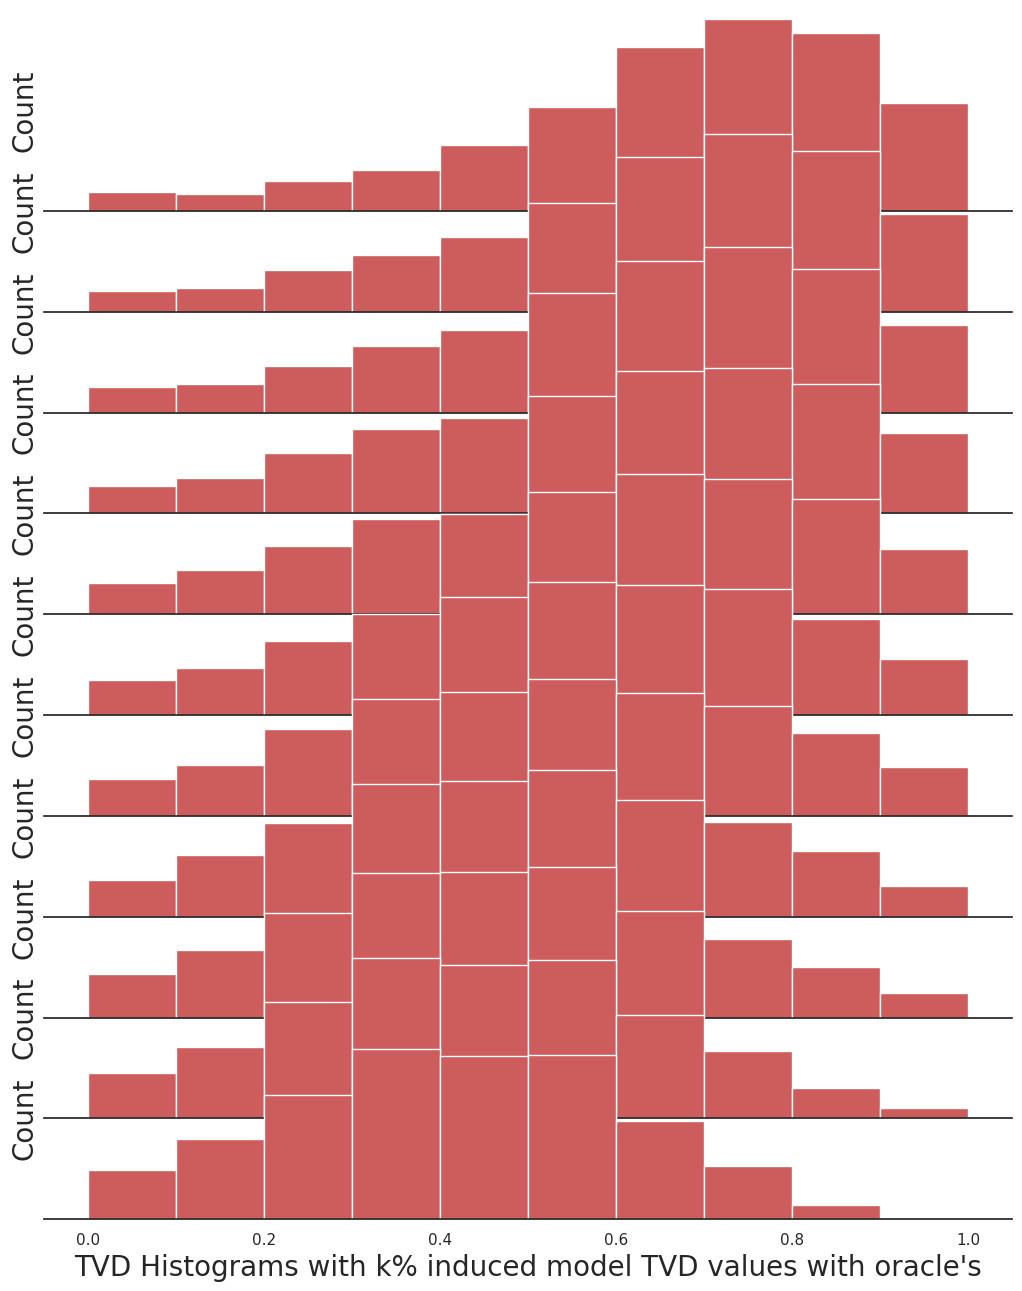

In [28]:
make_ridge_plot(metrics_dict['tvd_unbiased']['disjoint_oracles']['20'])